In [2]:
!pip install numpy
!pip install uncertainties

### Importing necessary libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from uncertainties import ufloat
import astropy.units as u
from astropy.cosmology import FlatLambdaCDM
from scipy.optimize import curve_fit

### Loading the data file containting the redshifts and apparent magnitudes as 'file'

In [4]:
file = np.loadtxt(fname='SNe_Wankhede.csv',  skiprows=1, delimiter=',')
#print(file.shape[:]) # Hashtagging, since its unnecesary to print but can be used if needed. 

<span style='font-size:large'>**Q1. Produce a plot of apparent magnitude against redshift for all the SNe in their catalogue.**</span><span style='font-size:large'> </span>



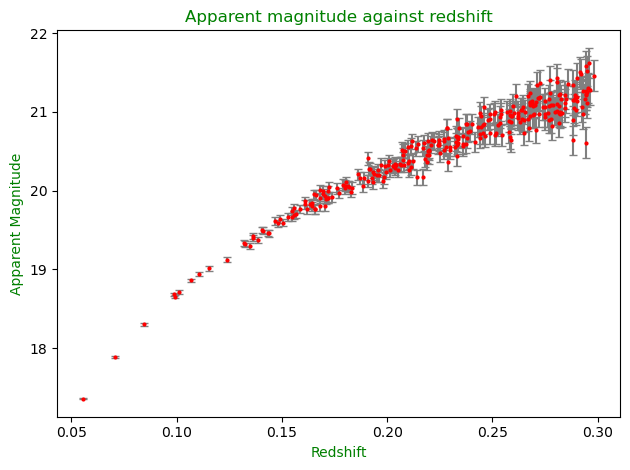

In [5]:
#Setting the redshifts column in 'File' as 'x', apparent magnitudes column as 'y' and errors in apparent magnitudes as 'yerr'

#Let,
x = file[:, 0] #redshifts
y = file[:, 1] #Apparent magnitudes 
yerr = file[:, 2] #error in apparent magnitudes

#SOLUTION:
#PLOTTING THE GRAPH.

plt.scatter(x, y, color='blue', s=1)
plt.xlabel('Redshift', color='green')
plt.ylabel('Apparent Magnitude', color='green')
plt.errorbar(x, y, yerr=yerr, fmt='o', markersize=2, color='r', ecolor='gray', capsize=3)
plt.title('Apparent magnitude against redshift', color='green')
plt.tight_layout() #no overlapping
plt.savefig('Apparent magnitude against redshift.png', dpi=300)
plt.show()

<span style='font-size:large'>**Q2. Calculate the luminosity distance \(in Mpc\) to the lowest redshift SNe in their catalogue, using only its apparent and absolute magnitudes \(see the appendix for the formula relating apparent and absolute magnitudes to luminosity distance\)**</span>


In [6]:
#calculating the luminosity distance using apparent magnitude in 'y' column of file 'file'.

print('Lowest redshift is: ', np.min(x))

#creating a filter to find the apparent magnitude corresponding to the lowest redshift
min_redshift_index = np.where(x == np.min(x))
apparent_mag = y[min_redshift_index]
apparent_mag_error = yerr[min_redshift_index]

print('Apparent Magnitude of lowest redshft is: ', apparent_mag, '+/-', apparent_mag_error)

#SOLUTION:

Apparent_mag = ufloat(17.3572, 0.006)
ABSOLUTE_MAGNITUDE = -19.5
#distance_modulus (u) = Absolute magnitude - apparent magnitude

def find_luminosity_distance():
    u = ABSOLUTE_MAGNITUDE - Apparent_mag
    #Applying the formula M = m - 5log10(dL) + 5 to find 'dL=luminosity distance'
    luminosity_distance = 10**(-(u - 5) / 5)
    return luminosity_distance
print('Luminosity distance to the lowest redshift SNe is: ', (find_luminosity_distance())/10**6, 'Mpc')

Lowest redshift is:  0.0554
Apparent Magnitude of lowest redshft is:  [17.3572] +/- [0.006]
Luminosity distance to the lowest redshift SNe is:  235.2+/-0.6 Mpc


<span style='font-size:medium'>**Q3. Use the lowest redshift SNe in their catalogue to obtain an initial estimate of Hubble's Constant, H\_0, which is H\_0\_i from here.** </span>


In [7]:
#In order to find the H_0 we use the formula; H_0 = c/dL*z
z = np.min(x)
dL = ufloat(235.2, 0.6) #in Mpc
d = dL/(1+z)
c = 3*10**5 #in units of km/s to make calculation easier

#SOLUTION:

def Hubble_constant(z):
    Hubble_constant = c*z/dL
    return Hubble_constant
print("Hubble's contant, H_0_i, using the lowest redshift SNe is: ", Hubble_constant(z), "Km/sec/Mpc")

Hubble's contant, H_0_i, using the lowest redshift SNe is:  70.66+/-0.18 Km/sec/Mpc


### 3.1 Initial estimate for the Age of the Universe as per H_0_i

In [8]:
def H0(z): return c*z/dL   #units are km/s/Mpc
def age_Gyr(z): return (1/H0(z)) * 3.0857e19/3.15576e16 # in Billion years

print("Age of Universe:", age_Gyr(z), "Billion years")

Age of Universe: 13.837+/-0.035 Billion years


<span style='font-size:medium'>**Q4. Calculate the luminosity distances \(in Mpc\) to every SNe in their catalogue, again, using only their apparent and absloute magnitudes.** </span>


In [9]:
Apparent_mag = [ufloat(nom_val, std_dev) for nom_val, std_dev in zip(y, yerr)]
ABSOLUTE_MAGNITUDE = -19.5

#SOLUTION:
#defining distance_modulus = u = Absolute magnitude - apparent magnitude

def luminosity_distance():
    u = [ABSOLUTE_MAGNITUDE - a for a in Apparent_mag]
    # Applying the formula M = m - 5log10(dL) + 5 to find 'dL'
    luminosity_distance = [10**(-(val - 5) / 5) for val in u]
    return luminosity_distance

#Using f string formatting in print for convinient display of the output of luminosity distance with redshifts. 
print(f"The luminosity distances in Mpc for redshifts corresponding to each apparent magnitude are as follows:\n")
for i, (redshift, distance) in enumerate(zip(x, luminosity_distance())):
  print(f"Redshift: {redshift:.4f}, Luminosity Distance: {(distance / 10**6):.2f} Mpc")

The luminosity distances in Mpc for redshifts corresponding to each apparent magnitude are as follows:

Redshift: 0.1704, Luminosity Distance: 769.27+/-21.86 Mpc
Redshift: 0.2897, Luminosity Distance: 1269.70+/-108.87 Mpc
Redshift: 0.1683, Luminosity Distance: 760.29+/-21.04 Mpc
Redshift: 0.1991, Luminosity Distance: 915.33+/-36.04 Mpc
Redshift: 0.2376, Luminosity Distance: 1171.33+/-66.73 Mpc
Redshift: 0.2330, Luminosity Distance: 1208.48+/-66.12 Mpc
Redshift: 0.2083, Luminosity Distance: 1003.64+/-43.45 Mpc
Redshift: 0.2621, Luminosity Distance: 1229.14+/-85.81 Mpc
Redshift: 0.2391, Luminosity Distance: 1124.60+/-64.89 Mpc
Redshift: 0.1155, Luminosity Distance: 503.96+/-6.34 Mpc
Redshift: 0.2777, Luminosity Distance: 1205.20+/-94.80 Mpc
Redshift: 0.2899, Luminosity Distance: 1373.54+/-117.97 Mpc
Redshift: 0.2891, Luminosity Distance: 1362.45+/-116.33 Mpc
Redshift: 0.0992, Luminosity Distance: 427.25+/-3.92 Mpc
Redshift: 0.2362, Luminosity Distance: 1091.29+/-61.41 Mpc
Redshift: 0.232

<span style='font-size:medium'>**Q5. Calculate the luminosity distance to redshift z = zmax, where zmax is the redshift of the highest redshift SN in the catalogue, assuming a cosmological model where ΩM,0 = 0.5, ΩD,0 = 0.5 and H\_0 = H\_0\_i**</span>



In [10]:
#As we have from above, 
H_0_i = ufloat(70.66, 0.18)

#Using astropy.cosmology, we set up Omega_m_0 as 0.5, and H_0 as H_0_i and Omga_d = 1 - Omega_m
cosmo = FlatLambdaCDM(H0=H_0_i.nominal_value, Om0=0.5) 

#Using the maximum redshift
z_max = np.max(x)
print('Maximum redshift is: ', z_max)

#SOLUTION:
luminosity_distance = cosmo.luminosity_distance(z_max)

# Print the luminosity distance
print("Luminosity distance for max redshift:", luminosity_distance)

Maximum redshift is:  0.2984
Luminosity distance for max redshift: 1467.7039592928268 Mpc


<span style='font-size:medium'>**Q6. Calculate the luminosity distances to a range of redshifts from z = 0.01 to z = zmax in increments of 10−3, assuming a cosmological model where ΩM,0 = 0.5, ΩD,0 = 0.5 and H0 = H\_0\_i**</span>



In [11]:
#Defining the range of redshifts to be used as per the above given condition. 
redshifts = np.arange(0.01, z_max + 0.001, 0.001)

#Given that, 
Omega_M_0 = 0.5 #matter density
Omega_D_0 = 0.5 #dark matter density

#Cosmlogical model setup
cosmo = FlatLambdaCDM(H0=H_0_i.nominal_value, Om0=Omega_M_0)

#SOLUTION:
luminosity_distance = cosmo.luminosity_distance(redshifts)
print("Luminosity distance::\n", luminosity_distance)

Luminosity distance::
 [  42.69118223   46.9891344    51.29229453   55.60065402   59.91420428
   64.23293673   68.55684282   72.885914     77.22014173   81.55951748
   85.90403274   90.25367903   94.60844785   98.96833073  103.33331922
  107.70340488  112.07857927  116.45883397  120.84416057  125.2345507
  129.62999596  134.03048799  138.43601845  142.84657898  147.26216127
  151.682757    156.10835787  160.5389556   164.97454191  169.41510854
  173.86064724  178.31114978  182.76660795  187.22701352  191.69235832
  196.16263415  200.63783285  205.11794626  209.60296625  214.09288468
  218.58769344  223.08738442  227.59194955  232.10138073  236.61566992
  241.13480906  245.65879012  250.18760507  254.7212459   259.25970462
  263.80297324  268.3510438   272.90390834  277.46155891  282.02398758
  286.59118644  291.16314758  295.73986312  300.32132517  304.90752587
  309.49845737  314.09411184  318.69448144  323.29955836  327.90933482
  332.52380301  337.14295518  341.76678355  346.3952804

<span style='font-size:medium'>**Q7. Calculate the apparent magnitude that a Type 1a would have at a range of redshifts between z = 0 and z = zmax, in increments of 10−3, assuming a cosmological model where ΩM,0 = 0.5, ΩD,0 = 0.5 and H0 = H0\_i**</span>



In [12]:
#SOLUTION:
#defining the formula for the calculation of apparent magnitude.

def apparent_magnitude(redshifts):
    luminosity_distance = cosmo.luminosity_distance(redshifts)
    apparent_magnitude = 5*np.log10(luminosity_distance.to(u.pc).value)-24.5
    return apparent_magnitude

print('Apparent Magnitudes are: \n', apparent_magnitude(redshifts))
#(The line in the output stating "...devide by zero encountered in log10..." is because of the fist value of redshift taken as zero as per the question.)

Apparent Magnitudes are: 
 [13.65169091 13.85998722 14.05026064 14.2253995  14.38764898 14.53878889
 14.68025405 14.81321802 14.93865297 15.05737324 15.17006776 15.27732457
 15.37964959 15.47748123 15.5712019  15.66114717 15.74761309 15.83086219
 15.91112835 15.98862081 16.06352754 16.13601799 16.2062455  16.27434922
 16.34045585 16.40468107 16.46713078 16.52790217 16.58708466 16.64476069
 16.70100646 16.7558925  16.80948426 16.86184255 16.913024   16.96308142
 17.01206414 17.0600183  17.10698712 17.15301117 17.19812854 17.24237506
 17.28578448 17.32838862 17.37021751 17.41129954 17.45166154 17.49132895
 17.53032585 17.56867511 17.60639843 17.64351644 17.68004878 17.71601411
 17.75143024 17.78631415 17.82068203 17.85454934 17.88793086 17.92084072
 17.95329244 17.98529897 18.01687272 18.04802556 18.0787689  18.10911369
 18.13907045 18.16864926 18.19785983 18.22671151 18.25521327 18.28337377
 18.31120134 18.338704   18.3658895  18.39276531 18.41933862 18.44561639
 18.47160534 18.49731195

<span style='font-size:medium'>**Q8. Show the apparent magnitudes calculated in Step 7 as a line on the plot produced in Step 1 \(please reproduce the plot\).**</span>



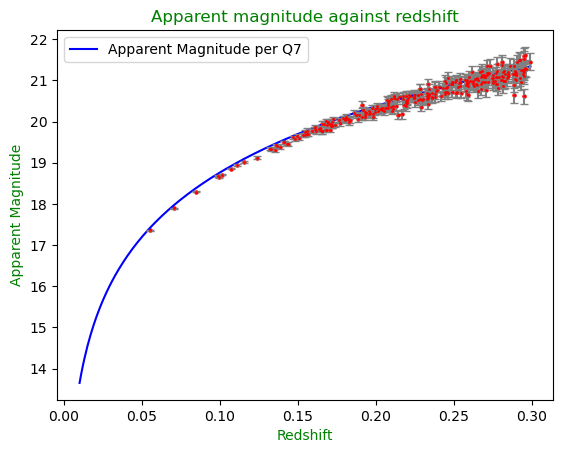

In [13]:
#We use the apparent magnitudes produced in Q7 to superimpose as a line in the plot of Q1. 

#SOLUTION:
#defining the line of apparent mag on the graph of Q1 
def apparent_magnitude(redshifts):
    luminosity_distance = cosmo.luminosity_distance(redshifts)
    apparent_magnitude = 5*np.log10(luminosity_distance.to(u.pc).value) - 24.5
    return apparent_magnitude

#setting parameters to plot the graph of the apparent magnitude in Q7 as a superimposed line on the graph in Q1.
redshifts = np.arange(0.01, z_max+0.001, 0.001)
x2 = redshifts
y2 = apparent_magnitude(redshifts)

#THE PLOT

#plot for the graph in Q1.
plt.scatter(x, y, color='r', s=5)

#plot the line of apparent magnitudes as per Q7. 
plt.plot(x2, y2, color='blue', label='Apparent Magnitude per Q7')
plt.xlabel('Redshift', color='green')
plt.ylabel('Apparent Magnitude', color='green')
plt.errorbar(x, y, yerr=yerr, fmt='o', markersize=1, color='r', ecolor='gray', capsize=3)
plt.title('Apparent magnitude against redshift', color='green')
plt.legend()
plt.savefig('Comparative plot of Apparent magnitude against redshift.png', dpi=300)
plt.show()

<span style='font-size:medium'>**Q9. Obtain best estimates, including uncertainties, for ΩM,0, ΩD,0 and H0 by fitting their apparent magnitude and redshift data \(Note: the best\-fitting H0 value is likely to similar to, but not the same as, H\_0\_i**</span>



In [14]:
#Setting up the Constants and initial parameter estimates
initial_H0 = 70.06 #as found above
initial_M = -19.5 #Absolute magnitude given
initial_Om = 0.3 #matter density

#SOLUTION:

#Defining the required functions,
def luminosity_distance(redshift, H0, Om):
    cosmo = FlatLambdaCDM(H0, Om0=Om)
    return cosmo.luminosity_distance(redshift)

def apparent_magnitude(redshift, H0, Om):
    dL = luminosity_distance(redshift, H0, Om)
    d = 10 * u.pc 
    return initial_M + 5 * np.log10(dL/d)

#Setting the initial guess for the parameters,
initial_guess = [initial_H0, initial_Om]

#Curve fitting,
optimized_params, param_covariance = curve_fit(apparent_magnitude, x, y, p0=initial_guess, sigma=yerr, bounds=([65, 0], [75, 1]))

#Extracting optimized parameters and their errors
H0_opt, Om_opt = optimized_params
H0_error, Om_error = np.sqrt(np.diag(param_covariance))

# Printing results
print("Optimized Hubble Constant = {:.3f} +/- {:.3f}".format(H0_opt, H0_error), 'Km/s/Mpc')
print("Optimized Omega matter = {:.3f} +/- {:.3f}".format(Om_opt, Om_error))
print("Optimized Omega dark energy = {:.3f} +/- {:.3f}".format(1 - Om_opt, Om_error))

Optimized Hubble Constant = 73.165 +/- 0.243 Km/s/Mpc
Optimized Omega matter = 0.502 +/- 0.036
Optimized Omega dark energy = 0.498 +/- 0.036


### 9.1 Final estimate for the Age of the Universe

In [17]:
#def H0(z): return c*z/dL   #units are km/s/Mpc
def age_Gyr(z): return (1/(H0_opt)) * 3.0857e19/3.15576e16 # in Billion years

print("Age of Universe:", age_Gyr(z), "Billion years")

Age of Universe: 13.364341965122009 Billion years


<span style='font-size:medium'>**Q10. Repeat Steps 7 and 8 using the best\-fit cosmological parameters \(again, please reproduce the plot from Step 1\).**</span>



In [18]:
#10.1) Solving for the first part of the question: Calculate the apparent magnitude that a Type 1a would have at a range of redshifts between z = 0 and z = zmax, in increments of 10−3, assuming a cosmological model with the best fit parameters.

redshift = np.arange(0, np.max(x) + 0.001, 0.001) #including z_max

#SOLUTION:

#As found above, 
H0_opt, Om_opt = optimized_params

#Using cosmology,
cosmo = FlatLambdaCDM(H0=H0_opt, Om0=Om_opt)

def apparent_magnitude(redshift):
    luminosity_distance = cosmo.luminosity_distance(redshift)
    apparent_magnitude = 5*np.log10(luminosity_distance.to(u.pc).value - 24.5)
    return apparent_magnitude
print('Apparent Magnitudes for type Ia for z[0, z_max] are: \n \n', apparent_magnitude(redshift))

#(The line in the output stating "divide by zero encountered in log10" is because of the fist value of redshift taken as zero as per the question.)

Apparent Magnitudes for type Ia for z[0, z_max] are: 
 
 [        nan 33.06393329 34.57044094 35.45224826 36.07828956 36.56418449
 36.96143306 37.29750692 37.58880419 37.84590198 38.0760223  38.28431627
 38.47458733 38.64972382 38.81197092 38.96310844 39.1045712  39.23753278
 39.36296533 39.48168319 39.59437531 39.70162972 39.80395233 39.90178156
 39.99549983 40.08544269 40.1719062  40.2551529  40.33541666 40.41290672
 40.48781105 40.56029911 40.63052422 40.69862554 40.76472978 40.8289526
 40.89139992 40.95216892 41.01134902 41.06902267 41.12526606 41.18014972
 41.2337391  41.28609501 41.33727409 41.38732914 41.43630949 41.48426127
 41.53122773 41.57724941 41.62236442 41.66660858 41.71001564 41.75261743
 41.79444397 41.83552364 41.8758833  41.91554836 41.95454292 41.99288983
 42.03061081 42.06772649 42.10425648 42.14021949 42.17563329 42.21051487
 42.24488042 42.2787454  42.3121246  42.34503214 42.37748155 42.40948577
 42.4410572  42.47220773 42.50294876 42.53329125 42.5632457  42.5928

C:\Users\yuvra\AppData\Local\Temp\ipykernel_20700\857562674.py:15: RuntimeWarning: invalid value encountered in log10
  apparent_magnitude = 5*np.log10(luminosity_distance.to(u.pc).value - 24.5)


C:\Users\yuvra\AppData\Local\Temp\ipykernel_20700\3654257143.py:19: RuntimeWarning: divide by zero encountered in log10
  apparent_magnitude = 5*np.log10(luminosity_distance.to(u.pc).value)


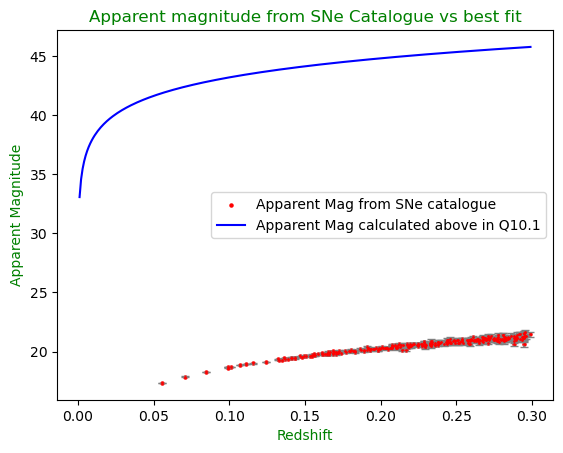

In [19]:
#10.2) Solving for the second part of the Question. Showing the apparent magnitudes calculated above as a line on the plot produced in Step 1. 

#As we have the redshift range, 
redshift = np.arange(0, np.max(x) + 0.001, 0.001) #Using zero as per the Q7 gives the line 'invalid value encountered in log10' in output but using it anyways because asked in the question.

#And,
#As found above, 
H0_opt, Om_opt = optimized_params

#SOLUTION:

#Using cosmology,
cosmo = FlatLambdaCDM(H0=H0_opt, Om0=Om_opt)

#defining the apparent magnitude as above

def apparent_magnitude(redshift):
    luminosity_distance = cosmo.luminosity_distance(redshift)
    apparent_magnitude = 5*np.log10(luminosity_distance.to(u.pc).value)
    return apparent_magnitude
#print(apparent_magnitude(redshift))
x3 = redshift
y3 = apparent_magnitude(x3)

#Plotting the graph

plt.scatter(x, y, color='r', s=5, label='Apparent Mag from SNe catalogue')
plt.plot(x3, y3, color='blue', label='Apparent Mag calculated above in Q10.1')
plt.xlabel('Redshift', color='green')
plt.ylabel('Apparent Magnitude', color='green')
plt.errorbar(x, y, yerr=yerr, fmt='o', markersize=1, color='r', ecolor='gray', capsize=3)
plt.title('Apparent magnitude from SNe Catalogue vs best fit', color='green')
plt.legend()
plt.savefig('Final plot - Best fit with SNe Catalogue.png', dpi=300)
plt.show()
#(The line in the output stating "...invalid value encountered in log10..." is because of the fist value of redshift taken as zero as per the question.)